In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [2]:
def atualiza_imagem(img, k):
  np.clip(img, 0, 255).astype(np.uint8)
  
  # aplicar um filtro passa-baixa na imagem original para suavizá-la
  filtro = np.ones((3,3), np.float32) / 9.0

  img_suave = cv2.filter2D(img, -1, filtro)

  # subtrair a imagem suavizada da imagem original para obter uma imagem de alta frequência
  img_alta_freq = img - img_suave

  # multiplicar a imagem de alta frequência pelo fator de realce (k)
  img_realce = k * img_alta_freq

  # adicionar o resultado à imagem original para obter a imagem final
  img_final = img + img_realce
  return img_final

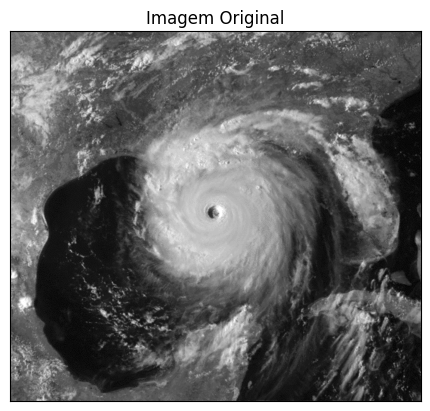

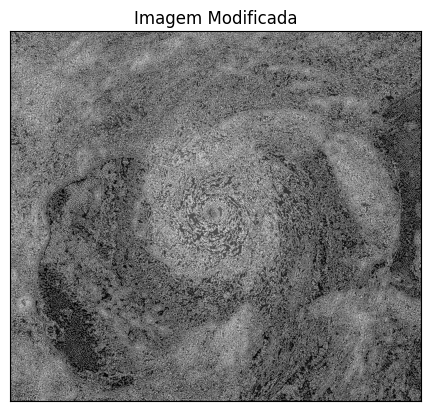

In [3]:
# carregar a imagem a ser processada
img = cv2.imread('Images/Fig0111(katrina_2005_08_29_NOAA).tif', cv2.IMREAD_GRAYSCALE)
k = 1.5

# chamando a função atualizar a imagem e atribuindo a imagem final a uma variável
img_final = atualiza_imagem(img, k)

#mostrar imagem original
plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.xticks([])
plt.yticks([])
plt.show()

# salvar e mostrar a imagem final
cv2.imwrite('imagem_final.jpg', img_final)
plt.imshow(img_final, cmap='gray')
plt.title("Imagem Modificada")
plt.xticks([])
plt.yticks([])
plt.show()